In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm
from scipy.io import loadmat

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as T

from sklearn.preprocessing import MinMaxScaler

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

# Load HR data

In [3]:
# hr_patches_file_path = "/content/drive/MyDrive/Hemanth/Dataset/IP_hr_patches.mat"
# hr_patches_data = loadmat(hr_patches_file_path)

# num_patches = 1201

# hr_patches_list = [hr_patches_data[f'hr_patch_{i}'] for i in range(1, num_patches)]

# hr_patches_array = np.array(hr_patches_list, dtype=np.float32)

# reshaped_array = hr_patches_array.reshape(-1, hr_patches_array.shape[-1])

# scaler = MinMaxScaler()
# normalized_array = scaler.fit_transform(reshaped_array)

# normalized_hr_patches_array = normalized_array.reshape(hr_patches_array.shape)

# hr_patches_tensor = torch.tensor(normalized_hr_patches_array).to(device)

# print("Shape of High-Resolution Patches Tensor:", hr_patches_tensor.shape)
# print(hr_patches_tensor.min(), hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [3]:
hr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_hr_patches.mat"
hr_patches_data = loadmat(hr_patches_file_path)

num_patches = 1601

hr_patches_list = [hr_patches_data[f'hr_patch_{i}'] for i in range(1, num_patches)]

hr_patches_array = np.array(hr_patches_list, dtype=np.float32)

reshaped_array = hr_patches_array.reshape(-1, hr_patches_array.shape[-1])

# Normalize the patches
scaler = MinMaxScaler()
normalized_array = scaler.fit_transform(reshaped_array)

total_array = normalized_array.reshape(hr_patches_array.shape)

normalized_hr_patches_array = total_array[:1200]

hr_patches_tensor = torch.tensor(normalized_hr_patches_array).to(device)

print("Shape of High-Resolution Patches Tensor:", hr_patches_tensor.shape)
print(hr_patches_tensor.min(), hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [4]:
normalized_test_hr_array = total_array[1200:]

test_hr_patches_tensor = torch.tensor(normalized_test_hr_array).to(device)

print("Shape of High-Resolution Patches Tensor:", test_hr_patches_tensor.shape)
print(test_hr_patches_tensor.min(), test_hr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([400, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [5]:
hr_patches_tensor = hr_patches_tensor.unsqueeze(4)
hr_patches_tensor = hr_patches_tensor.permute(0, 3, 1, 2, 4)
hr_patches_tensor.shape

torch.Size([1200, 200, 66, 66, 1])

In [6]:
test_hr_patches_tensor = test_hr_patches_tensor.unsqueeze(4)
test_hr_patches_tensor = test_hr_patches_tensor.permute(0, 3, 1, 2, 4)
test_hr_patches_tensor.shape

torch.Size([400, 200, 66, 66, 1])

# Load LR data

# Bicubic LR data

In [ ]:
# from scipy.ndimage import zoom

# # Load the LR patches from the .mat file
# bicubic_lr_patches_file_path = "/content/drive/MyDrive/Hemanth/Dataset/IP_lr_patches_bicubic.mat"
# bicubic_lr_patches_data = loadmat(bicubic_lr_patches_file_path)


# bicubic_lr_patches_list = [bicubic_lr_patches_data[f'lr_patch_{i}'] for i in range(1, num_patches)]

# # Upsample the patches using bilinear interpolation with a scale factor of 3x
# upsampled_lr_patches_array = np.array([zoom(patch, zoom=3, order=1) for patch in bicubic_lr_patches_list], dtype=np.float32)

# # Reshape the upsampled array
# reshaped_upsampled_lr_array = upsampled_lr_patches_array.reshape(-1, upsampled_lr_patches_array.shape[-1])

# # Normalize the patches
# normalized_lr_array = scaler.fit_transform(reshaped_upsampled_lr_array)

# # Reshape the normalized array back to patch form
# normalized_lr_patches_array = normalized_lr_array.reshape(upsampled_lr_patches_array.shape)

# # Convert the normalized patches to a tensor
# bicubic_lr_patches_tensor = torch.tensor(normalized_lr_patches_array).to(device)

# # Print the shape of the tensor and min/max values
# print("Shape of Low-Resolution Patches Tensor:", bicubic_lr_patches_tensor.shape)
# print("Min value:", bicubic_lr_patches_tensor.min().item())
# print("Max value:", bicubic_lr_patches_tensor.max().item())


In [ ]:
# bicubic_lr_patches_tensor = bicubic_lr_patches_tensor.permute(0, 3, 1, 2)
# bicubic_lr_patches_tensor.shape

# Bilinear LR data

In [5]:
# from scipy.ndimage import zoom

# bilinear_lr_patches_file_path = "/content/drive/MyDrive/Hemanth/Dataset/IP_lr_patches_bilinear.mat"
# bilinear_lr_patches_data = loadmat(bilinear_lr_patches_file_path)

# bilinear_lr_patches_list = [bilinear_lr_patches_data[f'lr_patch_{i}'] for i in range(1, num_patches)]

# # Upsample the patches using bilinear interpolation with a scale factor of 3x
# upsampled_lr_patches_array = np.array([zoom(patch, zoom=(3,3,1), order=3) for patch in bilinear_lr_patches_list], dtype=np.float32)

# # Reshape the upsampled array
# reshaped_upsampled_lr_array = upsampled_lr_patches_array.reshape(-1, upsampled_lr_patches_array.shape[-1])

# # Normalize the patches
# normalized_lr_array = scaler.fit_transform(reshaped_upsampled_lr_array)

# # Reshape the normalized array back to patch form
# normalized_lr_patches_array = normalized_lr_array.reshape((num_patches-1, 66, 66, 200))

# # Convert the normalized patches to a tensor
# bilinear_lr_patches_tensor = torch.tensor(normalized_lr_patches_array).to(device)

# # Print the shape of the tensor and min/max values
# print("Shape of Low-Resolution Patches Tensor:", bilinear_lr_patches_tensor.shape)
# print("Min value:", bilinear_lr_patches_tensor.min().item())
# print("Max value:", bilinear_lr_patches_tensor.max().item())


Shape of Low-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
Min value: 0.0
Max value: 1.000000238418579


In [7]:
from scipy.ndimage import zoom

bilinear_lr_patches_file_path = "D:\\Hemanth\\Dataset\\IP_lr_patches_bilinear.mat"
bilinear_lr_patches_data = loadmat(bilinear_lr_patches_file_path)

num_patches = 1601

bilinear_lr_patches_list = [bilinear_lr_patches_data[f'lr_patch_{i}'] for i in range(1, num_patches)]

upsampled_lr_patches_array = np.array([zoom(patch, zoom=(3,3,1), order=3) for patch in bilinear_lr_patches_list], dtype=np.float32)

reshaped_upsampled_lr_array = upsampled_lr_patches_array.reshape(-1, upsampled_lr_patches_array.shape[-1])

normalized_lr_array = scaler.fit_transform(reshaped_upsampled_lr_array)

total_lr_array = normalized_lr_array.reshape((num_patches-1, 66, 66, 200))

normalized_lr_patches_array = total_lr_array[:1200]

bilinear_lr_patches_tensor = torch.tensor(normalized_lr_patches_array).to(device)

print("Shape of High-Resolution Patches Tensor:", bilinear_lr_patches_tensor.shape)
print(bilinear_lr_patches_tensor.min(), bilinear_lr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([1200, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1.0000, device='cuda:0')


In [8]:
normalized_test_lr_array = total_lr_array[1200:]

test_bilinear_lr_patches_tensor = torch.tensor(normalized_test_lr_array).to(device)

print("Shape of High-Resolution Patches Tensor:", test_bilinear_lr_patches_tensor.shape)
print(test_bilinear_lr_patches_tensor.min(), test_bilinear_lr_patches_tensor.max())

Shape of High-Resolution Patches Tensor: torch.Size([400, 66, 66, 200])
tensor(0., device='cuda:0') tensor(1., device='cuda:0')


In [9]:
bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.unsqueeze(4)
bilinear_lr_patches_tensor = bilinear_lr_patches_tensor.permute(0, 3, 1, 2, 4)
bilinear_lr_patches_tensor.shape

torch.Size([1200, 200, 66, 66, 1])

In [10]:
test_bilinear_lr_patches_tensor = test_bilinear_lr_patches_tensor.unsqueeze(4)
test_bilinear_lr_patches_tensor = test_bilinear_lr_patches_tensor.permute(0, 3, 1, 2, 4)
test_bilinear_lr_patches_tensor.shape

torch.Size([400, 200, 66, 66, 1])

# Define Parameters

In [11]:
num_channels = hr_patches_tensor.shape[1]
hr_dimensions = hr_patches_tensor.shape[2]
lr_dimensions = bilinear_lr_patches_tensor.shape[2]
batch_size = 30
z_dim = hr_patches_tensor.shape[1]

print(num_channels, hr_dimensions, lr_dimensions, z_dim)

200 66 66 200


# Data Loader

In [12]:
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, hr_data, lr_data):
        self.hr_data = hr_data
        self.lr_data = lr_data

    def __len__(self):
        return len(self.hr_data)

    def __getitem__(self, idx):
        hr_sample = self.hr_data[idx]
        lr_sample = self.lr_data[idx]
        return hr_sample, lr_sample


In [13]:
custom_dataset = CustomDataset(hr_patches_tensor, bilinear_lr_patches_tensor)
data_loader = DataLoader(custom_dataset, batch_size=batch_size, shuffle=True)

In [8]:
# hr_data_loader = DataLoader(dataset = hr_patches_tensor,
#                          batch_size = batch_size,
#                          shuffle = False
#                          )

# lr_data_loader = DataLoader(dataset = bilinear_lr_patches_tensor,
#                          batch_size = batch_size,
#                          shuffle = False
#                          )

# Generator and Discriminator

In [14]:
class Generator(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.ConvTranspose3d( 2*num_channels, 650, (3,3,1), 1, (1,1,0)) # 66x66
    self.conv2 = nn.ConvTranspose3d( 650, 512, (3,3,1), 1, (1,1,0)) # 66x66
    self.conv3 = nn.ConvTranspose3d( 512, 256, (3,3,1), 1, (1,1,0)) # 66x66
    self.conv4 = nn.ConvTranspose3d( 256, 128, (3,3,1), 1, (1,1,0)) # 66x66
    self.conv5 = nn.ConvTranspose3d( 128, num_channels,  (3,3,1), 1, (1,1,0)) # 66x66

    self.bn1 = nn.BatchNorm3d(650)
    self.bn2 = nn.BatchNorm3d(512)
    self.bn3 = nn.BatchNorm3d(256)
    self.bn4 = nn.BatchNorm3d(128)

  def forward(self, noise, condition):
    x = torch.cat([noise, condition], dim=1)
    x = F.relu(self.bn1(self.conv1(x)))
    x = F.relu(self.bn2(self.conv2(x)))
    x = F.relu(self.bn3(self.conv3(x)))
    x = F.relu(self.bn4(self.conv4(x)))
    x = F.tanh(self.conv5(x))
    return x

G = Generator().to(device)
print(G)

Generator(
  (conv1): ConvTranspose3d(400, 650, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (conv2): ConvTranspose3d(650, 512, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (conv3): ConvTranspose3d(512, 256, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (conv4): ConvTranspose3d(256, 128, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (conv5): ConvTranspose3d(128, 200, kernel_size=(3, 3, 1), stride=(1, 1, 1), padding=(1, 1, 0))
  (bn1): BatchNorm3d(650, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [15]:
class Discriminator(nn.Module):
  def __init__(self):
    super().__init__()

    self.conv1 = nn.Conv3d(2*num_channels, 512, (3,3,1), (2,2,1), (1,1,0))
    self.conv2 = nn.Conv3d(512, 256, (3,3,1), (2,2,1), (1,1,0))
    self.conv3 = nn.Conv3d(256, 128, (3,3,1), (2,2,1), (1,1,0))
    self.conv4 = nn.Conv3d(128, 64, (3,3,1), (2,2,1), (1,1,0))
    self.conv5 = nn.Conv3d(64, 1, (5,5,1), 1, 0)

    self.bn2 = nn.BatchNorm3d(256)
    self.bn3 = nn.BatchNorm3d(128)
    self.bn4 = nn.BatchNorm3d(64)

  def forward(self, sr, hr):
    x = torch.cat([sr, hr], dim=1)
    x = F.leaky_relu(self.conv1(x), 0.2)
    x = F.leaky_relu(self.conv2(x), 0.2)
    x = self.bn2(x)
    x = F.leaky_relu(self.conv3(x), 0.2)
    x = self.bn3(x)
    x = F.leaky_relu(self.conv4(x), 0.2)
    x = self.bn4(x)
    x = torch.sigmoid(self.conv5(x)).view(-1,1)
    return x

D = Discriminator().to(device)
print(D)

Discriminator(
  (conv1): Conv3d(400, 512, kernel_size=(3, 3, 1), stride=(2, 2, 1), padding=(1, 1, 0))
  (conv2): Conv3d(512, 256, kernel_size=(3, 3, 1), stride=(2, 2, 1), padding=(1, 1, 0))
  (conv3): Conv3d(256, 128, kernel_size=(3, 3, 1), stride=(2, 2, 1), padding=(1, 1, 0))
  (conv4): Conv3d(128, 64, kernel_size=(3, 3, 1), stride=(2, 2, 1), padding=(1, 1, 0))
  (conv5): Conv3d(64, 1, kernel_size=(5, 5, 1), stride=(1, 1, 1))
  (bn2): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn3): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn4): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


# To Load G, D and parameters

In [ ]:
# G.load_state_dict(torch.load('/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/generator_175ep.pth'))
# D.load_state_dict(torch.load('/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/discriminator_175ep.pth'))

# # Load the optimizer states
# g_optimizer = optim.Adam(G.parameters(), lr=0.00001, betas=(0.5, 0.999))
# d_optimizer = optim.Adam(D.parameters(), lr=0.00001, betas=(0.5, 0.999))

# g_optimizer.load_state_dict(torch.load('/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/generator_optimizer_175ep.pth'))
# d_optimizer.load_state_dict(torch.load('/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/discriminator_optimizer_175ep.pth'))

# # Load additional parameters
# checkpoint = torch.load('/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/training_params_175ep.pth')
# num_epochs = checkpoint['num_epochs']
# losses = checkpoint['losses']
# disDecs = checkpoint['disDecs']
# lambda_rmse = checkpoint['lambda_rmse']
# lambda_sam = checkpoint['lambda_sam']

# # Remove .to(device) for G and D above and shift them to GPU here
# G = G.to(device)
# D = D.to(device)

# Training

In [16]:
def rmse_loss(input, target):
    return torch.sqrt(F.mse_loss(input, target))

def sam_loss(input, target):
    input_norm = F.normalize(input.reshape(input.size(0), -1), dim=1)
    target_norm = F.normalize(target.reshape(target.size(0), -1), dim=1)
    return torch.acos((input_norm * target_norm).sum(dim=1)).mean()

In [17]:
bceloss = nn.BCELoss()

g_optimizer = optim.Adam(G.parameters(), lr = 0.00001, betas=(0.5, 0.999))
d_optimizer = optim.Adam(D.parameters(), lr = 0.00001, betas=(0.5, 0.999))

In [18]:
num_epochs = 150

losses = []
disDecs = []

lambda_rmse = 0.9
lambda_sam = 0.4
lambda_adv = 0.1

for epoch in range(num_epochs):
#   for hr_batch, lr_batch in tqdm(zip(hr_data_loader, lr_data_loader), total=len(hr_data_loader)):

    hr_batch = hr_batch.to(device)
    lr_batch = lr_batch.to(device)

    hr_labels = torch.ones(batch_size,1).to(device)
    sr_labels = torch.zeros(batch_size,1).to(device)

    # Train Discriminator
    d_optimizer.zero_grad()

    # Forward pass to test hr batch against hr batch
    pred_hr = D(hr_batch, hr_batch)
    d_loss_hr = bceloss(pred_hr, hr_labels)

    # Forward pass to test sr batch against hr batch
    noise = torch.randn(batch_size, z_dim, lr_dimensions, lr_dimensions,1).to(device)
    sr_images = G(noise, lr_batch)
    pred_sr = D(sr_images, hr_batch)
    d_loss_sr = bceloss(pred_sr, sr_labels)

    d_loss = d_loss_hr + d_loss_sr

    # Backprop
    d_loss.backward()
    d_optimizer.step()

    # Train Generator twice every time we train Discriminator
    for _ in range(2):

      g_optimizer.zero_grad()

      noise = torch.randn(batch_size, z_dim, lr_dimensions, lr_dimensions,1).to(device)
      sr_images = G(noise, lr_batch)
      pred_sr = D(sr_images, hr_batch)

      # Generator loss
      adversarial_loss_value = -torch.mean(D(sr_images, hr_batch))
      rmse_loss_value = rmse_loss(sr_images, hr_batch)
      sam_loss_value = sam_loss(sr_images, hr_batch)

      g_loss = lambda_adv * adversarial_loss_value + lambda_rmse * rmse_loss_value + lambda_sam * sam_loss_value

      # Backprop
      g_loss.backward()
      g_optimizer.step()

  losses.append([d_loss.item(), g_loss.item()])

  d1 = torch.mean((pred_hr > 0.5).float().detach())
  d2 = torch.mean((pred_sr > 0.5).float().detach())
  disDecs.append([d1.item(), d2.item()])

  print(f"Epoch [{epoch+1}/{num_epochs}], G Loss: {g_loss.item()},  D Real HR: {d_loss_hr.item()}, D Fake SR: {d_loss_sr.item()}")


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


Epoch [1/150], G Loss: 0.5413219928741455,  D Real HR: 0.059085141867399216, D Fake SR: 0.10180357843637466


100%|██████████| 40/40 [00:34<00:00,  1.16it/s]


Epoch [2/150], G Loss: 0.20024323463439941,  D Real HR: 0.11430170387029648, D Fake SR: 0.15575918555259705


100%|██████████| 40/40 [00:44<00:00,  1.11s/it]


Epoch [3/150], G Loss: 0.15473142266273499,  D Real HR: 0.2563374936580658, D Fake SR: 0.22153735160827637


100%|██████████| 40/40 [00:34<00:00,  1.14it/s]


Epoch [4/150], G Loss: 0.1488872617483139,  D Real HR: 0.4255438446998596, D Fake SR: 0.4334436357021332


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [5/150], G Loss: 0.14337784051895142,  D Real HR: 0.23740273714065552, D Fake SR: 0.5680519342422485


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [6/150], G Loss: 0.1221214309334755,  D Real HR: 0.3319666087627411, D Fake SR: 0.57908695936203


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [7/150], G Loss: 0.1129549890756607,  D Real HR: 0.3515068292617798, D Fake SR: 0.4385644495487213


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [8/150], G Loss: 0.11505144834518433,  D Real HR: 0.29726338386535645, D Fake SR: 0.3442875146865845


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [9/150], G Loss: 0.10687784105539322,  D Real HR: 0.3052738904953003, D Fake SR: 0.30691424012184143


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [10/150], G Loss: 0.11005625873804092,  D Real HR: 0.14801150560379028, D Fake SR: 0.3130854368209839


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [11/150], G Loss: 0.10307702422142029,  D Real HR: 0.12633495032787323, D Fake SR: 0.13831740617752075


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [12/150], G Loss: 0.10607537627220154,  D Real HR: 0.07703141123056412, D Fake SR: 0.10375037044286728


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [13/150], G Loss: 0.10807086527347565,  D Real HR: 0.037775877863168716, D Fake SR: 0.05166717991232872


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [14/150], G Loss: 0.10952344536781311,  D Real HR: 0.036364033818244934, D Fake SR: 0.05076796934008598


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [15/150], G Loss: 0.10498508810997009,  D Real HR: 0.03144101798534393, D Fake SR: 0.02866007760167122


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [16/150], G Loss: 0.10495863854885101,  D Real HR: 0.020742012187838554, D Fake SR: 0.024174125865101814


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [17/150], G Loss: 0.10500186681747437,  D Real HR: 0.011780593544244766, D Fake SR: 0.01765352115035057


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [18/150], G Loss: 0.1037893071770668,  D Real HR: 0.01447986252605915, D Fake SR: 0.018192613497376442


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [19/150], G Loss: 0.10419732332229614,  D Real HR: 0.01304520945996046, D Fake SR: 0.013003026135265827


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [20/150], G Loss: 0.10293781757354736,  D Real HR: 0.010631476528942585, D Fake SR: 0.010737036354839802


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [21/150], G Loss: 0.10331124067306519,  D Real HR: 0.007162357214838266, D Fake SR: 0.011305981315672398


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [22/150], G Loss: 0.10208646953105927,  D Real HR: 0.006719519384205341, D Fake SR: 0.011608556844294071


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [23/150], G Loss: 0.10110363364219666,  D Real HR: 0.00683501735329628, D Fake SR: 0.008200393989682198


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [24/150], G Loss: 0.10022307932376862,  D Real HR: 0.005149705335497856, D Fake SR: 0.00755936186760664


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [25/150], G Loss: 0.10116466879844666,  D Real HR: 0.004563280381262302, D Fake SR: 0.007899424061179161


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [26/150], G Loss: 0.09886627644300461,  D Real HR: 0.004808424971997738, D Fake SR: 0.007634397596120834


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [27/150], G Loss: 0.10189954936504364,  D Real HR: 0.0059834918938577175, D Fake SR: 0.00494184996932745


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [28/150], G Loss: 0.09986235201358795,  D Real HR: 0.0038157161325216293, D Fake SR: 0.00434900214895606


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [29/150], G Loss: 0.10124020278453827,  D Real HR: 0.0035670939832925797, D Fake SR: 0.004290453158318996


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [30/150], G Loss: 0.09756189584732056,  D Real HR: 0.002862033899873495, D Fake SR: 0.003901388496160507


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [31/150], G Loss: 0.09986646473407745,  D Real HR: 0.004386608954519033, D Fake SR: 0.004060863051563501


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [32/150], G Loss: 0.09923753887414932,  D Real HR: 0.0028993042651563883, D Fake SR: 0.0032908355351537466


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [33/150], G Loss: 0.09754028916358948,  D Real HR: 0.002928609261289239, D Fake SR: 0.003376262728124857


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [34/150], G Loss: 0.09759513288736343,  D Real HR: 0.002025504130870104, D Fake SR: 0.0031116141472011805


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [35/150], G Loss: 0.09837722778320312,  D Real HR: 0.0031471403781324625, D Fake SR: 0.0028058120515197515


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [36/150], G Loss: 0.09864659607410431,  D Real HR: 0.0026512539479881525, D Fake SR: 0.0029692526441067457


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [37/150], G Loss: 0.10557122528553009,  D Real HR: 0.0024200202897191048, D Fake SR: 0.0010340575827285647


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [38/150], G Loss: 0.09667991101741791,  D Real HR: 0.0021856469102203846, D Fake SR: 0.003607753198593855


100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


Epoch [39/150], G Loss: 0.09583930671215057,  D Real HR: 0.0018572278786450624, D Fake SR: 0.002978657139465213


100%|██████████| 40/40 [00:37<00:00,  1.07it/s]


Epoch [40/150], G Loss: 0.09677673876285553,  D Real HR: 0.0020400367211550474, D Fake SR: 0.00319194165058434


100%|██████████| 40/40 [00:35<00:00,  1.12it/s]


Epoch [41/150], G Loss: 0.09614379703998566,  D Real HR: 0.001456997822970152, D Fake SR: 0.0011594555107876658


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [42/150], G Loss: 0.09434211254119873,  D Real HR: 0.0014007588615640998, D Fake SR: 0.0021289910655468702


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [43/150], G Loss: 0.0964735820889473,  D Real HR: 0.0018928784411400557, D Fake SR: 0.0024265239480882883


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [44/150], G Loss: 0.09296873211860657,  D Real HR: 0.0014117253012955189, D Fake SR: 0.0025962688960134983


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [45/150], G Loss: 0.09761478006839752,  D Real HR: 0.0017385699320584536, D Fake SR: 0.0015064001781865954


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [46/150], G Loss: 0.09547965228557587,  D Real HR: 0.0015843628207221627, D Fake SR: 0.00212473189458251


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [47/150], G Loss: 0.09649907797574997,  D Real HR: 0.0015450279461219907, D Fake SR: 0.00133335473947227


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [48/150], G Loss: 0.09309989959001541,  D Real HR: 0.0014344854280352592, D Fake SR: 0.0020679947920143604


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [49/150], G Loss: 0.09419255703687668,  D Real HR: 0.0013542694505304098, D Fake SR: 0.0016789899673312902


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [50/150], G Loss: 0.0937134176492691,  D Real HR: 0.0011977278627455235, D Fake SR: 0.0019266029121354222


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [51/150], G Loss: 0.09581612050533295,  D Real HR: 0.0013725184835493565, D Fake SR: 0.0010190615430474281


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [52/150], G Loss: 0.09488049149513245,  D Real HR: 0.0015655577881261706, D Fake SR: 0.0011034905910491943


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [53/150], G Loss: 0.09292765706777573,  D Real HR: 0.0010176710784435272, D Fake SR: 0.001532128662802279


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [54/150], G Loss: 0.09236320853233337,  D Real HR: 0.0010479281190782785, D Fake SR: 0.0013184603303670883


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [55/150], G Loss: 0.09410056471824646,  D Real HR: 0.0010135077172890306, D Fake SR: 0.0011033727787435055


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [56/150], G Loss: 0.09159938991069794,  D Real HR: 0.0009665282559581101, D Fake SR: 0.0017499385867267847


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [57/150], G Loss: 0.09239019453525543,  D Real HR: 0.0010199135867878795, D Fake SR: 0.0011373499874025583


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [58/150], G Loss: 0.08993767946958542,  D Real HR: 0.0007458788459189236, D Fake SR: 0.0014457544311881065


100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


Epoch [59/150], G Loss: 0.09054043143987656,  D Real HR: 0.0009171532583422959, D Fake SR: 0.0014235011767596006


100%|██████████| 40/40 [00:44<00:00,  1.11s/it]


Epoch [60/150], G Loss: 0.09020702540874481,  D Real HR: 0.0008369298302568495, D Fake SR: 0.0014245506608858705


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [61/150], G Loss: 0.09159448742866516,  D Real HR: 0.000792835489846766, D Fake SR: 0.0009224337409250438


100%|██████████| 40/40 [00:37<00:00,  1.08it/s]


Epoch [62/150], G Loss: 0.08937934041023254,  D Real HR: 0.0008124560699798167, D Fake SR: 0.000999293988570571


100%|██████████| 40/40 [00:48<00:00,  1.22s/it]


Epoch [63/150], G Loss: 0.08994744718074799,  D Real HR: 0.0008987823384813964, D Fake SR: 0.0006306415307335556


100%|██████████| 40/40 [00:38<00:00,  1.03it/s]


Epoch [64/150], G Loss: 0.08955748379230499,  D Real HR: 0.0008132187649607658, D Fake SR: 0.001581635675393045


100%|██████████| 40/40 [00:45<00:00,  1.14s/it]


Epoch [65/150], G Loss: 0.09454576671123505,  D Real HR: 0.0008845682605169713, D Fake SR: 0.0005656451103277504


100%|██████████| 40/40 [00:52<00:00,  1.32s/it]


Epoch [66/150], G Loss: 0.08888036012649536,  D Real HR: 0.0008378243073821068, D Fake SR: 0.0010759916622191668


100%|██████████| 40/40 [00:54<00:00,  1.35s/it]


Epoch [67/150], G Loss: 0.08929406106472015,  D Real HR: 0.000653051829431206, D Fake SR: 0.0011172210797667503


100%|██████████| 40/40 [00:54<00:00,  1.36s/it]


Epoch [68/150], G Loss: 0.08891072869300842,  D Real HR: 0.0008057830273173749, D Fake SR: 0.0012679245555773377


100%|██████████| 40/40 [00:54<00:00,  1.36s/it]


Epoch [69/150], G Loss: 0.09271734952926636,  D Real HR: 0.0006984880892559886, D Fake SR: 0.0006221425719559193


100%|██████████| 40/40 [01:51<00:00,  2.79s/it]


Epoch [70/150], G Loss: 0.09533209353685379,  D Real HR: 0.0007167626172304153, D Fake SR: 0.0004746470949612558


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]


Epoch [71/150], G Loss: 0.08856344223022461,  D Real HR: 0.0005829696310684085, D Fake SR: 0.0012893399689346552


100%|██████████| 40/40 [00:52<00:00,  1.31s/it]


Epoch [72/150], G Loss: 0.08941592276096344,  D Real HR: 0.0007883564103394747, D Fake SR: 0.0005439664819277823


100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


Epoch [73/150], G Loss: 0.08823984116315842,  D Real HR: 0.0006657257326878607, D Fake SR: 0.000876114412676543


100%|██████████| 40/40 [00:34<00:00,  1.14it/s]


Epoch [74/150], G Loss: 0.08950652182102203,  D Real HR: 0.0005919990944676101, D Fake SR: 0.00043862414895556867


100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


Epoch [75/150], G Loss: 0.08606366813182831,  D Real HR: 0.0007110120495781302, D Fake SR: 0.0009066162747330964


100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


Epoch [76/150], G Loss: 0.09171559661626816,  D Real HR: 0.000848687719553709, D Fake SR: 0.0004210876068100333


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [77/150], G Loss: 0.08618362247943878,  D Real HR: 0.0005405014380812645, D Fake SR: 0.0008179836440831423


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [78/150], G Loss: 0.08687328547239304,  D Real HR: 0.0006670375587418675, D Fake SR: 0.0005542288417927921


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [79/150], G Loss: 0.08936141431331635,  D Real HR: 0.0005946953897364438, D Fake SR: 0.0005284545477479696


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [80/150], G Loss: 0.08591948449611664,  D Real HR: 0.0005597594426944852, D Fake SR: 0.0008523091091774404


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [81/150], G Loss: 0.08784167468547821,  D Real HR: 0.0005889124586246908, D Fake SR: 0.0008634882979094982


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [82/150], G Loss: 0.08622129261493683,  D Real HR: 0.0004897139151580632, D Fake SR: 0.0008888718439266086


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [83/150], G Loss: 0.08499743789434433,  D Real HR: 0.00043000286677852273, D Fake SR: 0.000624422391410917


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [84/150], G Loss: 0.08523465692996979,  D Real HR: 0.0004976503551006317, D Fake SR: 0.0006173687870614231


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [85/150], G Loss: 0.08683981001377106,  D Real HR: 0.0004895848105661571, D Fake SR: 0.0005583047168329358


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [86/150], G Loss: 0.0868590772151947,  D Real HR: 0.0005660889437422156, D Fake SR: 0.0003982165944762528


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [87/150], G Loss: 0.08573786914348602,  D Real HR: 0.0004177805967628956, D Fake SR: 0.0005881271208636463


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [88/150], G Loss: 0.08286100625991821,  D Real HR: 0.0004291133373044431, D Fake SR: 0.0007157059735618532


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [89/150], G Loss: 0.08580148965120316,  D Real HR: 0.0005280943005345762, D Fake SR: 0.0005546962493099272


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [90/150], G Loss: 0.08400669693946838,  D Real HR: 0.0004650903574656695, D Fake SR: 0.0006936557474546134


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [91/150], G Loss: 0.08351384103298187,  D Real HR: 0.00038391025736927986, D Fake SR: 0.0005182524328120053


100%|██████████| 40/40 [00:34<00:00,  1.14it/s]


Epoch [92/150], G Loss: 0.08215361833572388,  D Real HR: 0.0003820580313913524, D Fake SR: 0.00039216005825437605


100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


Epoch [93/150], G Loss: 0.08218559622764587,  D Real HR: 0.0003395332314539701, D Fake SR: 0.0006480178562924266


100%|██████████| 40/40 [00:35<00:00,  1.14it/s]


Epoch [94/150], G Loss: 0.0822671502828598,  D Real HR: 0.00037998813786543906, D Fake SR: 0.00045283458894118667


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [95/150], G Loss: 0.08363840728998184,  D Real HR: 0.0003535838332027197, D Fake SR: 0.0004579816886689514


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [96/150], G Loss: 0.08253014087677002,  D Real HR: 0.00036969708162359893, D Fake SR: 0.0003911284147761762


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [97/150], G Loss: 0.08278824388980865,  D Real HR: 0.0003990231198258698, D Fake SR: 0.0007437951862812042


100%|██████████| 40/40 [00:53<00:00,  1.33s/it]


Epoch [98/150], G Loss: 0.08170026540756226,  D Real HR: 0.00028985628159716725, D Fake SR: 0.00025190229644067585


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [99/150], G Loss: 0.08243042230606079,  D Real HR: 0.00028676140937022865, D Fake SR: 0.0004156690265517682


100%|██████████| 40/40 [00:35<00:00,  1.13it/s]


Epoch [100/150], G Loss: 0.08277053385972977,  D Real HR: 0.0003278663498349488, D Fake SR: 0.000276909617241472


100%|██████████| 40/40 [00:34<00:00,  1.14it/s]


Epoch [101/150], G Loss: 0.0827009528875351,  D Real HR: 0.000244932365603745, D Fake SR: 0.000219510227907449


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [102/150], G Loss: 0.08103621751070023,  D Real HR: 0.0002593939134385437, D Fake SR: 0.0005666825454682112


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [103/150], G Loss: 0.0808359682559967,  D Real HR: 0.0002578831044957042, D Fake SR: 0.0004968338180333376


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [104/150], G Loss: 0.08157159388065338,  D Real HR: 0.0002597808197606355, D Fake SR: 0.0004412108100950718


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [105/150], G Loss: 0.08196550607681274,  D Real HR: 0.0002899122191593051, D Fake SR: 0.00048338790656998754


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [106/150], G Loss: 0.08126264810562134,  D Real HR: 0.0002225675416411832, D Fake SR: 0.0006149958353489637


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [107/150], G Loss: 0.08119513094425201,  D Real HR: 0.0002491650520823896, D Fake SR: 0.0005429624579846859


100%|██████████| 40/40 [00:36<00:00,  1.09it/s]


Epoch [108/150], G Loss: 0.08156902343034744,  D Real HR: 0.00034429141669534147, D Fake SR: 0.00023668580979574472


100%|██████████| 40/40 [00:43<00:00,  1.08s/it]


Epoch [109/150], G Loss: 0.08020789176225662,  D Real HR: 0.0002219254383817315, D Fake SR: 0.00032912992173805833


100%|██████████| 40/40 [00:42<00:00,  1.06s/it]


Epoch [110/150], G Loss: 0.08083920180797577,  D Real HR: 0.00032554689096286893, D Fake SR: 0.00042680982733145356


100%|██████████| 40/40 [00:41<00:00,  1.04s/it]


Epoch [111/150], G Loss: 0.07994014024734497,  D Real HR: 0.0002243654162157327, D Fake SR: 0.0005522877909243107


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [112/150], G Loss: 0.08179275691509247,  D Real HR: 0.00027846373268403113, D Fake SR: 0.0003535694850143045


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [113/150], G Loss: 0.0807521641254425,  D Real HR: 0.00019792553212027997, D Fake SR: 0.0001814055285649374


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


Epoch [114/150], G Loss: 0.07842454314231873,  D Real HR: 0.00021723928512074053, D Fake SR: 0.000395985203795135


100%|██████████| 40/40 [00:39<00:00,  1.02it/s]


Epoch [115/150], G Loss: 0.07995042949914932,  D Real HR: 0.00023259500449057668, D Fake SR: 0.00046581661445088685


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


Epoch [116/150], G Loss: 0.08029727637767792,  D Real HR: 0.0002301934000570327, D Fake SR: 0.00030587989022023976


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


Epoch [117/150], G Loss: 0.0799044743180275,  D Real HR: 0.00016970289289020002, D Fake SR: 0.0003455361584201455


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [118/150], G Loss: 0.07866521179676056,  D Real HR: 0.00019799944129772484, D Fake SR: 0.000425987527705729


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [119/150], G Loss: 0.07858520746231079,  D Real HR: 0.00016284982848446816, D Fake SR: 0.00023167443578131497


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [120/150], G Loss: 0.0795908123254776,  D Real HR: 0.00017821525398176163, D Fake SR: 0.0002601725282147527


100%|██████████| 40/40 [00:40<00:00,  1.02s/it]


Epoch [121/150], G Loss: 0.08000053465366364,  D Real HR: 0.00018036452820524573, D Fake SR: 0.0002373300085309893


100%|██████████| 40/40 [00:40<00:00,  1.01s/it]


Epoch [122/150], G Loss: 0.08133461326360703,  D Real HR: 0.0002363948879064992, D Fake SR: 0.00021279889915604144


100%|██████████| 40/40 [00:38<00:00,  1.04it/s]


Epoch [123/150], G Loss: 0.08017335832118988,  D Real HR: 0.00017303784261457622, D Fake SR: 0.0002189890801673755


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [124/150], G Loss: 0.078463114798069,  D Real HR: 0.0001604611607035622, D Fake SR: 0.000175352644873783


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [125/150], G Loss: 0.07648774981498718,  D Real HR: 0.00017328876128885895, D Fake SR: 0.0002183686156058684


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [126/150], G Loss: 0.0789869874715805,  D Real HR: 0.0001484122476540506, D Fake SR: 0.00024668825790286064


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [127/150], G Loss: 0.07831050455570221,  D Real HR: 0.0001558345538796857, D Fake SR: 0.0002550205681473017


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [128/150], G Loss: 0.0775340348482132,  D Real HR: 0.00016312413208652288, D Fake SR: 0.0002721573691815138


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [129/150], G Loss: 0.07724206149578094,  D Real HR: 9.966676589101553e-05, D Fake SR: 0.0003263888938818127


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [130/150], G Loss: 0.07945369184017181,  D Real HR: 0.00020268355729058385, D Fake SR: 0.0002591653319541365


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [131/150], G Loss: 0.07762155681848526,  D Real HR: 0.0001343571493634954, D Fake SR: 0.00029420186183415353


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [132/150], G Loss: 0.08018290996551514,  D Real HR: 0.00020454346667975187, D Fake SR: 8.22597139631398e-05


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [133/150], G Loss: 0.07658979296684265,  D Real HR: 0.00013267247413750738, D Fake SR: 0.00026640744181349874


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [134/150], G Loss: 0.07678111642599106,  D Real HR: 0.00013458821922540665, D Fake SR: 0.00011510741751408204


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [135/150], G Loss: 0.07802240550518036,  D Real HR: 0.0001751745876390487, D Fake SR: 0.0001120182714657858


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [136/150], G Loss: 0.07791686058044434,  D Real HR: 0.00011694185377564281, D Fake SR: 0.00017603070591576397


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [137/150], G Loss: 0.07748603075742722,  D Real HR: 0.00012428441550582647, D Fake SR: 0.00023770073312334716


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [138/150], G Loss: 0.0762648656964302,  D Real HR: 0.00010683220170903951, D Fake SR: 0.00012798856187146157


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [139/150], G Loss: 0.07608941197395325,  D Real HR: 0.00010397339065093547, D Fake SR: 0.00010508032573852688


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [140/150], G Loss: 0.07648831605911255,  D Real HR: 9.9966797279194e-05, D Fake SR: 0.00022469683608505875


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [141/150], G Loss: 0.07797382771968842,  D Real HR: 0.00011220702435821295, D Fake SR: 0.00011318495671730489


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [142/150], G Loss: 0.07731810212135315,  D Real HR: 0.0001632467028684914, D Fake SR: 0.0001613799249753356


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [143/150], G Loss: 0.07662329077720642,  D Real HR: 0.00010893496801145375, D Fake SR: 0.00016433473501820117


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [144/150], G Loss: 0.07856670022010803,  D Real HR: 8.750215056352317e-05, D Fake SR: 4.822511618840508e-05


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [145/150], G Loss: 0.07865847647190094,  D Real HR: 0.00010285443568136543, D Fake SR: 7.576467760372907e-05


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [146/150], G Loss: 0.07612471282482147,  D Real HR: 0.00011272489064140245, D Fake SR: 0.00012158824392827228


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [147/150], G Loss: 0.07474055886268616,  D Real HR: 9.229900751961395e-05, D Fake SR: 0.0002664974599611014


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [148/150], G Loss: 0.07725241035223007,  D Real HR: 8.584081660956144e-05, D Fake SR: 0.00013142169336788356


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [149/150], G Loss: 0.07717172056436539,  D Real HR: 7.99161207396537e-05, D Fake SR: 4.4289903598837554e-05


100%|██████████| 40/40 [00:34<00:00,  1.15it/s]


Epoch [150/150], G Loss: 0.07592648267745972,  D Real HR: 9.620995842851698e-05, D Fake SR: 0.00017144098819699138


In [28]:
# Convert performance from list to numpy array
losses = np.array(losses)
disDecs = np.array([[value.detach().cpu().numpy() if isinstance(value, torch.Tensor) else value for value in sublist] for sublist in disDecs])


# To Save G, D and parameters

In [20]:
# Save the generator and discriminator state dicts
torch.save(G.state_dict(), 'D:\\Hemanth\\SuperResolution\\RmseSam\\Model\SuperRes_generator_75per.pth')
# torch.save(D.state_dict(), '/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/hr_discriminator_10ep.pth')

# # Save the optimizer states
# torch.save(g_optimizer.state_dict(), '/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/hr_generator_optimizer_10ep.pth')
# torch.save(d_optimizer.state_dict(), '/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/hr_discriminator_optimizer_10ep.pth')

# # Save additional parameters
# torch.save({
#     'num_epochs': num_epochs,
#     'losses': losses,
#     'disDecs': disDecs,
#     'lambda_rmse': lambda_rmse,
#     'lambda_sam': lambda_sam
# }, '/content/drive/MyDrive/Hemanth/SuperResolution/RmseSam/Model/hr_training_params_10ep.pth')


<>:2: SyntaxWarning: invalid escape sequence '\S'
<>:2: SyntaxWarning: invalid escape sequence '\S'
C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\2635966660.py:2: SyntaxWarning: invalid escape sequence '\S'
  torch.save(G.state_dict(), 'D:\\Hemanth\\SuperResolution\\RmseSam\\Model\SuperRes_generator_75per.pth')


In [21]:
# Smooth function
def smooth(x, window_len=100, window='hanning'):
    s = np.r_[x[window_len-1:0:-1], x, x[-2:-window_len-1:-1]]
    if window == 'flat': #moving average
        w = np.ones(window_len,'d')
    else:
        w = getattr(np, window)(window_len)
    y = np.convolve(w/w.sum(), s, mode='valid')
    return y


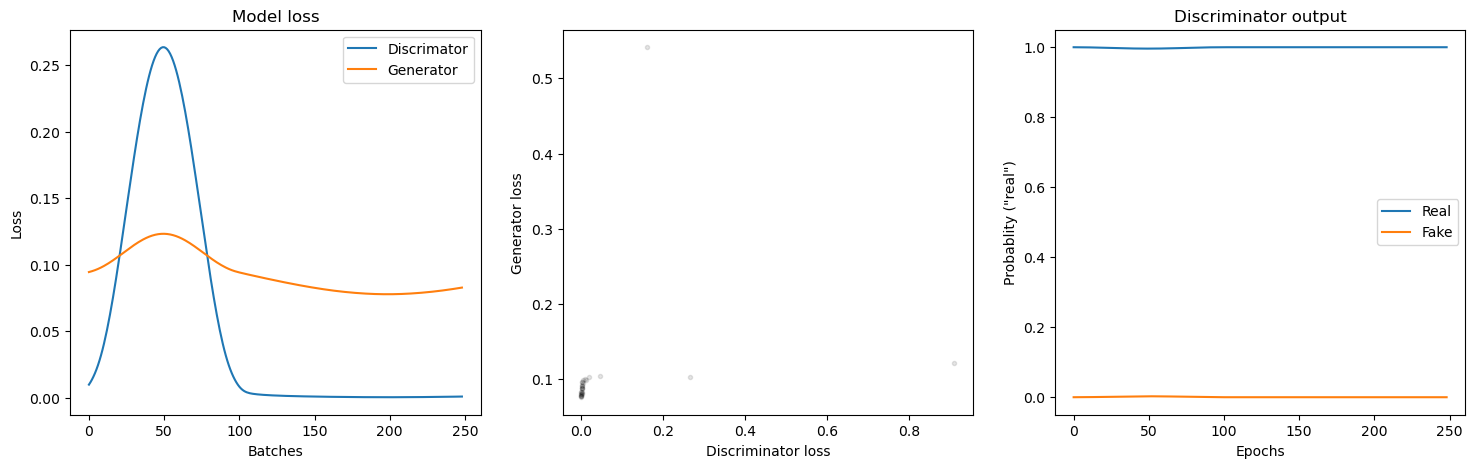

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].plot(smooth(losses[:, 0]))
ax[0].plot(smooth(losses[:, 1]))
ax[0].set_xlabel('Batches')
ax[0].set_ylabel('Loss')
ax[0].set_title('Model loss')
ax[0].legend(['Discrimator', 'Generator'])

ax[1].plot(losses[::5, 0], losses[::5, 1], 'k.', alpha=0.1)
ax[1].set_xlabel('Discriminator loss')
ax[1].set_ylabel('Generator loss')

ax[2].plot(smooth(disDecs[:, 0]))
ax[2].plot(smooth(disDecs[:, 1]))
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Probablity ("real")')
ax[2].set_title('Discriminator output')
ax[2].legend(['Real', 'Fake'])

plt.show()

# TESTING ON TRAIN SET

In [23]:
G.eval()

noise = torch.randn(1, 200, 66, 66, 1).to(device)

lr_patch = bilinear_lr_patches_tensor[0]
lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)

with torch.no_grad():
  sr_patch = G(noise, lr_patch_tensor)

sr_patch = sr_patch.cpu().squeeze().numpy()

lr_patch_np = lr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\4232382449.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)


In [24]:
hr_patch = hr_patches_tensor[0]
hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)
hr_patch_np = hr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\3881191169.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)


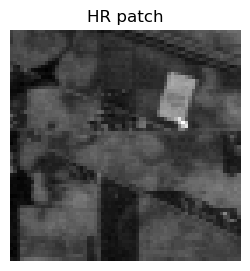

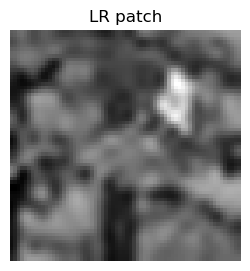

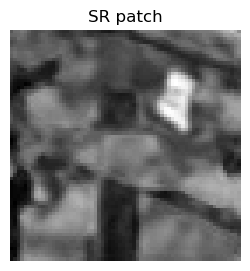

In [25]:
# Plot the HR patch
plt.figure(figsize=(3, 3))
plt.imshow(hr_patch_np[5, :, :], cmap='gray')
plt.title('HR patch')
plt.axis('off')
plt.show()

# Plot the LR patch
plt.figure(figsize=(3, 3))
plt.imshow(lr_patch_np[5,:,:], cmap='gray')
plt.title('LR patch')
plt.axis('off')
plt.show()

# Plot the SR patch
plt.figure(figsize=(3, 3))
plt.imshow(sr_patch[5,:,:], cmap='gray')
plt.title('SR patch')
plt.axis('off')
plt.show()

In [26]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def psnr_rmse_sam(image1, image2):
    # Calculate PSNR and RMSE
    psnr = peak_signal_noise_ratio(image1, image2, data_range=hr_patch_np.max())
    rmse = np.sqrt(mean_squared_error(image1, image2))

    # Flatten the images
    image1_flat = image1.reshape(-1, 200)
    image2_flat = image2.reshape(-1, 200)

    # Calculate SAM
    numerator = np.sum(image1_flat * image2_flat, axis=1)
    denominator = np.sqrt(np.sum(image1_flat ** 2, axis=1) * np.sum(image2_flat ** 2, axis=1))
    sam = np.arccos(np.clip(numerator / denominator, -1.0, 1.0)) * (180 / np.pi)  # Convert to degrees

    return psnr, rmse, np.mean(sam)


psnr_value, rmse_value, sam_value = psnr_rmse_sam(hr_patch_np, sr_patch)
print("PSNR:", psnr_value)
print("RMSE:", rmse_value)
print("SAM:", sam_value)


PSNR: 26.415540376183987
RMSE: 0.04777745729320447
SAM: 5.691683


# TESTING ON TEST SET

In [29]:
G.eval()

noise = torch.randn(1, 200, 66, 66, 1).to(device)

lr_patch = test_bilinear_lr_patches_tensor[20]
lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)

with torch.no_grad():
  sr_patch = G(noise, lr_patch_tensor)

sr_patch = sr_patch.cpu().squeeze().numpy()

lr_patch_np = lr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\235625479.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  lr_patch_tensor = torch.tensor(lr_patch, dtype=torch.float32).unsqueeze(0).to(device)


In [30]:
hr_patch = test_hr_patches_tensor[20]
hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)
hr_patch_np = hr_patch_tensor.squeeze().cpu().numpy()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5564\951927354.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  hr_patch_tensor = torch.tensor(hr_patch, dtype=torch.float32).unsqueeze(0).to(device)


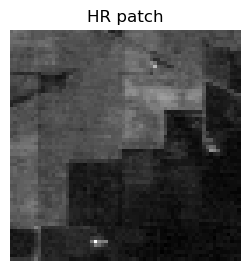

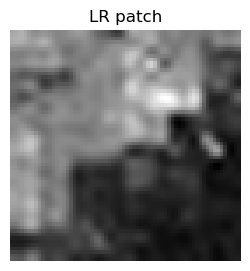

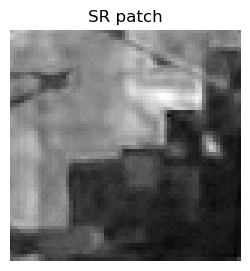

In [31]:
# Plot the HR patch
plt.figure(figsize=(3, 3))
plt.imshow(hr_patch_np[5, :, :], cmap='gray')
plt.title('HR patch')
plt.axis('off')
plt.show()

# Plot the LR patch
plt.figure(figsize=(3, 3))
plt.imshow(lr_patch_np[5,:,:], cmap='gray')
plt.title('LR patch')
plt.axis('off')
plt.show()

# Plot the SR patch
plt.figure(figsize=(3, 3))
plt.imshow(sr_patch[5,:,:], cmap='gray')
plt.title('SR patch')
plt.axis('off')
plt.show()

In [32]:
import numpy as np
from skimage.metrics import peak_signal_noise_ratio, mean_squared_error

def psnr_rmse_sam(image1, image2):
    # Calculate PSNR and RMSE
    psnr = peak_signal_noise_ratio(image1, image2, data_range=hr_patch_np.max())
    rmse = np.sqrt(mean_squared_error(image1, image2))

    # Flatten the images
    image1_flat = image1.reshape(-1, 200)
    image2_flat = image2.reshape(-1, 200)

    # Calculate SAM
    numerator = np.sum(image1_flat * image2_flat, axis=1)
    denominator = np.sqrt(np.sum(image1_flat ** 2, axis=1) * np.sum(image2_flat ** 2, axis=1))
    sam = np.arccos(np.clip(numerator / denominator, -1.0, 1.0)) * (180 / np.pi)  # Convert to degrees

    return psnr, rmse, np.mean(sam)


psnr_value, rmse_value, sam_value = psnr_rmse_sam(hr_patch_np, sr_patch)
print("PSNR:", psnr_value)
print("RMSE:", rmse_value)
print("SAM:", sam_value)


PSNR: 27.71114685482578
RMSE: 0.04115690015675662
SAM: 5.3738265
